In [53]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [54]:
np.random.seed(10)
P, Q = (np.random.rand(i, 2) for i in (4, 5))
P_big, Q_big = (np.random.rand(i, 80) for i in (100, 120))

print(P, "\n\n", Q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [55]:
def naive(P, Q):
    """
    A naive solution for finding pairvise distances between poins in P and Q

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p, q)

    >>> naive(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement a naive solution
    # ***************************************************
    D = np.zeros((P.shape[0], Q.shape[0]))
    for i in range(P.shape[0]):
        for j in range(Q.shape[0]):
            D[i, j] = np.sqrt((P[i, 0] - Q[j, 0])**2 + (P[i, 1] - Q[j, 1])**2)

    return D
            


test(naive)

✅ Your `naive` passed 1 tests.


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [56]:
rows, cols = np.indices((P.shape[0], Q.shape[0]))
print(rows, end="\n\n")
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [57]:
print(P[rows.ravel()], end="\n\n")
print(Q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [61]:
def with_indices(P, Q):
    """
    An optimized solution using matching indices

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p, q)

    >>> with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement an optimized solution
    # ***************************************************
    rows, cols = np.indices((P.shape[0], Q.shape[0]))
    # D = np.sqrt(np.sum((P[rows.ravel()] - Q[cols.ravel()])**2, axis = 1))
    D = np.linalg.norm(P[rows.ravel()] - Q[cols.ravel()], axis = 1)
    D = np.reshape(D, (P.shape[0], Q.shape[0]))
    return D


test(with_indices)

✅ Your `with_indices` passed 1 tests.


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [41]:
from scipy.spatial.distance import cdist


def scipy_version(P, Q):
    """
    A solution using scipy

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)

    Returns:
        D: numpy array of shape=(p, q)

    >>> scipy_version(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    return cdist(P, Q)

### Numpy Magic

In [62]:
(Q[np.newaxis, :, :] - P[:, np.newaxis, :]).shape

(4, 5, 2)

In [63]:
Q[np.newaxis, :, :].shape

(1, 5, 2)

In [64]:
P[:, np.newaxis, :]

array([[[0.77132064, 0.02075195]],

       [[0.63364823, 0.74880388]],

       [[0.49850701, 0.22479665]],

       [[0.19806286, 0.76053071]]])

In [65]:
def tensor_broadcasting(P, Q):
    """
    A solution using tensor broadcasting

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)

    Returns:
        D: numpy array of shape=(p, q)

    >>> tensor_broadcasting(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    return np.sqrt(np.sum((P[:, np.newaxis, :] - Q[np.newaxis, :, :]) ** 2, axis=2))

# Compare methods

In [66]:
methods = [
    naive,
    # naive_2,  # This is another possible solution. Feel free to comment it out if you have only one solution.
    with_indices,
    # with_indices_2,  # This is another possible solution. Feel free to comment it out if you have only one solution.
    scipy_version,
    tensor_broadcasting,
]
timers = []
for f in methods:
    r = %timeit -o f(P_big, Q_big)
    timers.append(r)

16.6 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.29 ms ± 68.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
365 µs ± 782 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.09 ms ± 36.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


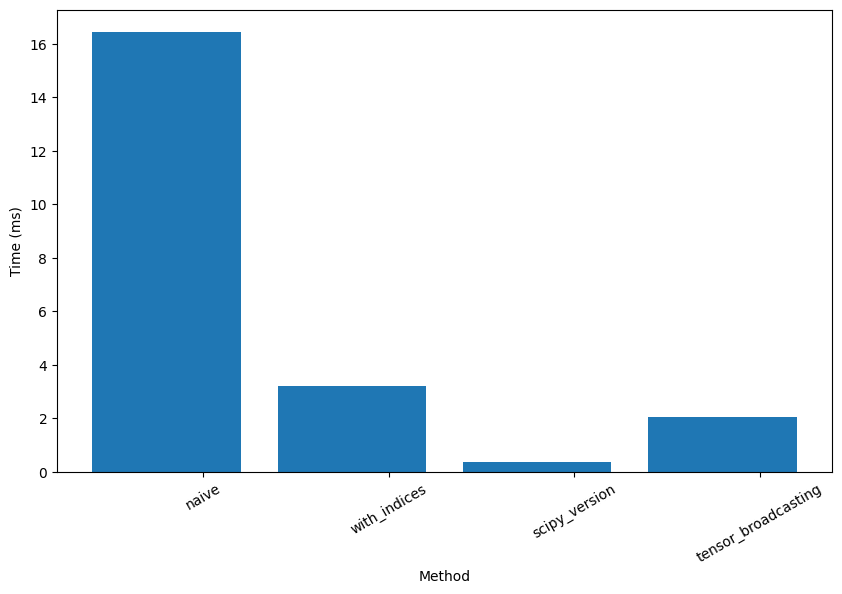

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(len(methods)), [r.best * 1000 for r in timers], log=False
)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods)) + 0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel("Method")
plt.ylabel("Time (ms)")
plt.show()